In [ ]:
pip install pybamm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.0/766.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 93.1 MB/s eta 0:00:00


In [1]:
import pybamm
import numpy as np

parameter_values = pybamm.ParameterValues("Mohtat2020")

parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.38,
 'Cell cooling surface area [m2]': 0.41,
 'Cell volume [m3]': 3.92e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Edge heat transfer coefficient [W.m-2.K-1]': 5.0,
 'Electrode height [m]': 1.0,
 'Electrode width [m]': 0.205,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_PeymanMPM at 0x00000261942BE820>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_PeymanMPM at 0x00000261942BE790>,
 'Electron charge [C]': 1.602176634e-19,
 'Exchange-current density for plating [A.m-2]': 0.001,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in n

In [2]:
def cycle(inital_soc = 0.5, c_rate = 1, cycle_number = 2, period = 1):

    time_last = int(1/c_rate / 2 * 3600)
    experiment = pybamm.Experiment(
        [
            (
                "Charge at "+ str(c_rate) +" C until 4.2 V",
                "Hold at 4.2 V until 50 mA",
                "Rest for 5 min",
                "Discharge at "+ str(c_rate) +" C until 2.8 V",
                "Rest for 5 min",
            )
        ]
        * cycle_number +
        ["Charge at "+ str(c_rate) +" C for "+ str(time_last) +" s until 4.2 V",
        ],
        period = str(period) + "s",
        )

    model = pybamm.lithium_ion.SPMe()
    # model.print_parameter_info()
    # sim = pybamm.Simulation(parameter_values=parameter_values)

    sim = pybamm.Simulation(
                            model,
                            experiment = experiment,
                            solver = pybamm.CasadiSolver(),
                            parameter_values = parameter_values
                            )

    sim.build_for_experiment(initial_soc = inital_soc)
    sim.solve()
    # sol = sim.solution
    # sol.save("SPMe_sol.pkl")

    return sim


In [3]:
import numpy as np
import pandas as pd

def drive_cycle(inital_soc = 0.5, period = 1):

    root_url = "/content/drive/MyDrive/Battery_learner/"
    file_name = "drivecycle"

    df = pd.read_csv(root_url+file_name+".csv")
    cycledata = np.array(df)

    cycledata[:,0] = cycledata[:,0] * 10
    cycledata[:,1] = cycledata[:,1] / 10 * 5

    experiment = pybamm.Experiment([pybamm.step.current(cycledata)])

    model = pybamm.lithium_ion.SPMe()
    # model.print_parameter_info()
    # sim = pybamm.Simulation(parameter_values=parameter_values)

    sim = pybamm.Simulation(
                            model,
                            experiment = experiment,
                            solver = pybamm.CasadiSolver(),
                            parameter_values = parameter_values
                            )

    sim.build_for_experiment(initial_soc = inital_soc)
    sim.solve()

    # sol = sim.solution
    # sol.save("SPMe_sol.pkl")

    return sim

In [4]:
test_model = pybamm.lithium_ion.SPMe()

test_model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


'Average negative particle concentration [mol.m-3]',
'Negative particle surface concentration [mol.m-3]',
'Average postive particle concentration [mol.m-3]',
'Postive particle surface concentration [mol.m-3]',
'Negative particle concentration overpotential [V]',
'Postive particle concentration overpotential [V]',
'Negative electrode potential [V]',
'Positive electrode potential [V]',
'Electrolyte potential [V]'

 'Maximum concentration in negative electrode [mol.m-3]': 28746.0,
 'Maximum concentration in positive electrode [mol.m-3]': 35380.0,

In [5]:
import csv

def savedata(sol = None,
             period = 1,
             filename = "cycle_data",
             inital_soc = 0.5,
             capacity = 5.0):

    neg_max = 28746
    pos_max = 35380


    t = sol["Time [s]"].entries
    t_eval = np.arange(0, int(sol["Time [s]"].entries[-1]),1)

    V = sol["Voltage [V]"](t_eval)
    I = sol["Current [A]"](t_eval)
    Q = sol["Discharge capacity [A.h]"](t_eval)

    anc = sol["Average negative particle concentration [mol.m-3]"](t_eval)
    snc = sol["X-averaged negative particle surface concentration [mol.m-3]"](t_eval)

    apc = sol["Average positive particle concentration [mol.m-3]"](t_eval)
    spc = sol["X-averaged positive particle surface concentration [mol.m-3]"](t_eval)

    nop = sol["X-averaged battery negative reaction overpotential [V]"](t_eval)
    pop = sol["X-averaged battery positive reaction overpotential [V]"](t_eval)

    nep = sol["X-averaged negative electrode potential [V]"](t_eval)
    pep = sol["X-averaged positive electrode potential [V]"](t_eval)

    ep = sol["X-averaged electrolyte potential [V]"](t_eval)

    outputfile = open(filename+".csv","w", encoding='utf-8', newline='')
    writer = csv.writer(outputfile)
    writer.writerow(["time","voltage","rate","soc",
                     "negative average soc","negative surface soc",
                     "positive average soc","positive surface soc",
                     "negative overpotential","positive overpotential",
                     "negative potential","positive potential",
                     "electrolyte potential"
                     ])
    for step in t_eval:
      writer.writerow([step,V[step],I[step]/capacity,inital_soc - Q[step]/capacity,
                      anc[step]/neg_max,snc[step]/neg_max,
                      apc[step]/pos_max,spc[step]/pos_max,
                      nop[step],pop[step],
                      nep[step],pep[step],ep[step]]
                      )
    outputfile.close()

    print(filename+" saved")


In [7]:
cyclelist = [1]
root_url = ""
inital_soc = 0.5

for c_rate in cyclelist:
  sim = cycle(inital_soc = inital_soc, c_rate = c_rate, cycle_number = 2, period = 1)
  savedata(sol = sim.solution,
           period = 1,
           filename = root_url + "spme_cccv_data_test"+str(c_rate),
           inital_soc = inital_soc)

spme_cccv_data_test1 saved


In [9]:
pybamm.print_citations(output_format="bibtex")


ImportError: Citations could not be registered. If you are on Google Colab - pybtex does not work with Google Colab due to a known bug - https://bitbucket.org/pybtex-devs/pybtex/issues/148/. Please manually cite all the references.
Error encountered -
Optional dependency pybtex.database is not available. See https://docs.pybamm.org/en/latest/source/user_guide/installation/index.html#optional-dependencies for more details.

In [ ]:
cyclelist = [0.05, 0.1, 0.2, 0.3, 0.4, 0.8, 1, 1.6]
root_url = "/content/drive/MyDrive/Battery_learner/data_spme_multi/"
inital_soc = 0.5

for c_rate in cyclelist:
  sim = cycle(inital_soc = inital_soc, c_rate = c_rate, cycle_number = 2, period = 1)
  savedata(sol = sim.solution,
           period = 1,
           filename = root_url + "spme_cccv_data"+str(c_rate),
           inital_soc = inital_soc)


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.05 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.1 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.2 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.3 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.4 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data0.8 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data1 saved
/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_cccv_data1.6 saved


In [ ]:
inital_socs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.9]
root_url = "/content/drive/MyDrive/Battery_learner/data_spme_multi/"

for inital_soc in inital_socs:
    sim = drive_cycle(inital_soc = inital_soc, period = 1)
    savedata(sol = sim.solution,
             period = 1,
             filename = root_url + "spme_dc_data"+str(inital_soc),
             inital_soc = inital_soc)

2025-03-03 10:22:40.672 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.3 saved


2025-03-03 10:22:41.819 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.4 saved


2025-03-03 10:22:43.438 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.5 saved


2025-03-03 10:22:44.504 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.6 saved


2025-03-03 10:22:45.848 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.7 saved


2025-03-03 10:22:47.422 - [WARNING] callbacks.on_experiment_infeasible_time(240): 

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.

	Experiment is infeasible: default duration (6000.0 seconds) was reached during 'Step([[0.000e+00 7.500e+00]
 [5.000e+00 7.500e+00]
 [1.000e+01 1.000e+01]
 ...
 [5.990e+03 0.000e+00]
 [5.995e+03 0.000e+00]
 [6.000e+03 0.000e+00]], duration=6000.0, period=5.0, direction=discharge)'. The returned solution only contains up to step 1 of cycle 1. Please specify a duration in the step instructions.


/content/drive/MyDrive/Battery_learner/data_spme_multi/spme_dc_data0.9 saved


In [ ]:

output_variables = ["Time [s]",
                    "Current [A]",
                    "Voltage [V]",
                    "Discharge capacity [A.h]"]

# sol.save_data("sol_data.csv", output_variables)
sim.plot(output_variables=output_variables)


interactive(children=(FloatSlider(value=0.0, description='t', max=1.6666666666666667, step=0.01666666666666666…

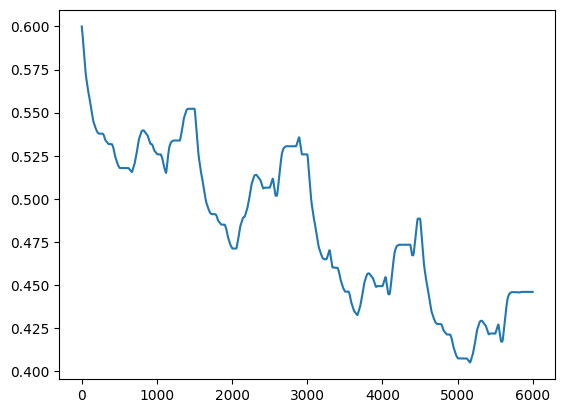

In [ ]:
import matplotlib.pyplot as plt

root_url = "/content/drive/MyDrive/Battery_learner/data_spme_multi/"
file_name = "spme_dc_data0.6"

df = pd.read_csv(root_url+file_name+".csv")
cycledata = np.array(df)

plt.figure()
plt.plot(cycledata[:,3])

plt.show()
plt.close()
